# Pandas Part 2 Assignment: Student Dataset
- Name: Khalid Salim
- Group: CAI3_AIS4_G1

## Importing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading CSV File

In [2]:
df = pd.read_csv('bi.csv', encoding='latin1')
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80


## Part 1 - Data Cleaning

### 1.1 Check Data Structure

In [3]:
df.shape

(77, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          77 non-null     object 
 1   lNAME          77 non-null     object 
 2   Age            77 non-null     int64  
 3   gender         77 non-null     object 
 4   country        77 non-null     object 
 5   residence      77 non-null     object 
 6   entryEXAM      77 non-null     int64  
 7   prevEducation  77 non-null     object 
 8   studyHOURS     77 non-null     int64  
 9   Python         75 non-null     float64
 10  DB             77 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 6.7+ KB


In [5]:
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80


**Q: Which columns should be categorical and which should be numerical?**

**Answer:**

**Categorical:** gender, country, residence, prevEducation

**Numerical:** Age, entryEXAM, studyHOURS, Python, DB

### 1.2 Detect & fix inconsistent categories

In [6]:
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80


In [7]:
df['gender'].unique()

array(['Female', 'M', 'Male', 'F', 'female', 'male'], dtype=object)

In [8]:
df['country'].unique()

array(['Norway', 'Kenya', 'Uganda', 'Rsa', 'South Africa', 'Norge',
       'norway', 'Denmark', 'Netherlands', 'Italy', 'Spain', 'UK',
       'Somali', 'Nigeria', 'Germany', 'France'], dtype=object)

In [9]:
df['prevEducation'].unique()

array(['Masters', 'Diploma', 'HighSchool', 'High School', 'Bachelors',
       'Barrrchelors', 'diploma', 'DIPLOMA', 'Diplomaaa', 'Doctorate'],
      dtype=object)

In [10]:
# fixing gender column by title() format
df['gender'] = df['gender'].str.title()
df['gender'].unique()

array(['Female', 'M', 'Male', 'F'], dtype=object)

In [11]:
# fixing gender column by replacing values
df['gender'] = df['gender'].replace({'M': 'Male', 'F': 'Female'})
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [12]:
# fixing country column
df['country'] = df['country'].str.title().replace({'Rsa': 'South Africa', 'Norge': 'Norway', 'Somali': 'Somalia'})
df['country'].unique()

array(['Norway', 'Kenya', 'Uganda', 'South Africa', 'Denmark',
       'Netherlands', 'Italy', 'Spain', 'Uk', 'Somalia', 'Nigeria',
       'Germany', 'France'], dtype=object)

In [13]:
# fixing prevEducation column
df['prevEducation'] = df['prevEducation'].str.title().replace({'Highschool': 'High School', 'Barrrchelors': 'Bachelors', 'Diplomaaa': 'Diploma'})
df['prevEducation'].unique()

array(['Masters', 'Diploma', 'High School', 'Bachelors', 'Doctorate'],
      dtype=object)

### 1.3 Handle duplicates

In [14]:
df.duplicated().sum()

np.int64(0)

## Part 2 - Missing Data

### 2.1 Identify missing values

In [15]:
# Identify missing values
df.isnull().sum()

fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           2
DB               0
dtype: int64

---
#### **Q&A**
**Q:** Question: Which columns are most affected by missing values?

**A:** Python column

---

In [16]:
df['Python'].unique()

array([59., 60., 74., nan, 91., 88., 80., 85., 83., 79., 70., 75., 87.,
       76., 84., 33., 30., 61., 82., 66., 81., 31., 90., 69., 57., 86.,
       78., 48., 45., 15., 63., 72.])

In [17]:
(df['Python'].isnull()).value_counts()

Python
False    75
True      2
Name: count, dtype: int64

### 2.2 Impute missing values

In [18]:
# Filling nulls in python column with median
df['Python'] = df['Python'].fillna(df['Python'].median())
df['Python'].unique()

array([59., 60., 74., 81., 91., 88., 80., 85., 83., 79., 70., 75., 87.,
       76., 84., 33., 30., 61., 82., 66., 31., 90., 69., 57., 86., 78.,
       48., 45., 15., 63., 72.])

## Part 3 - Outliers

### 3.1 Detect outliers

#### 3.1.1 Detect outliers using summary statistics ".describe() method"

In [19]:
df_stats = df.describe()
df_stats

,Age,entryEXAM,studyHOURS,Python,DB
count,77.000000,77.000000,77.000000,77.000000,77.000000
mean,35.207792,76.753247,149.714286,75.987013,69.467532
std,10.341966,16.475784,12.743272,15.228517,17.033701
min,21.000000,28.000000,114.000000,15.000000,30.000000
25%,27.000000,69.000000,144.000000,72.000000,56.000000
50%,33.000000,80.000000,156.000000,81.000000,71.000000
75%,42.000000,90.000000,158.000000,85.000000,83.000000
max,71.000000,98.000000,160.000000,91.000000,100.000000


In [20]:
df_stats.loc['75%']-df_stats.loc['25%'] * 3.5

Age           -52.5
entryEXAM    -151.5
studyHOURS   -346.0
Python       -167.0
DB           -113.0
dtype: float64

In [21]:
# IQR = Q3 - Q1
# Lower Bound = Q1 - (1.5 * IQR)
# Upper Bound = Q3 + (1.5 * IQR)
IQR = df_stats.loc['75%']-df_stats.loc['25%']
df_stats.loc['l_bound'] = df_stats.loc['25%'] - 1.5 * IQR
df_stats.loc['u_bound'] = df_stats.loc['75%'] + 1.5 * IQR
df_stats

,Age,entryEXAM,studyHOURS,Python,DB
count,77.000000,77.000000,77.000000,77.000000,77.000000
mean,35.207792,76.753247,149.714286,75.987013,69.467532
std,10.341966,16.475784,12.743272,15.228517,17.033701
min,21.000000,28.000000,114.000000,15.000000,30.000000
25%,27.000000,69.000000,144.000000,72.000000,56.000000
50%,33.000000,80.000000,156.000000,81.000000,71.000000
75%,42.000000,90.000000,158.000000,85.000000,83.000000
max,71.000000,98.000000,160.000000,91.000000,100.000000
l_bound,4.500000,37.500000,123.000000,52.500000,15.500000
u_bound,64.500000,121.500000,179.000000,104.500000,123.500000


In [22]:
#df.loc[['row1', 'row2']]

age_out = list((df['Age'][df['Age'] < df_stats.loc['l_bound', 'Age']])) + list(df['Age'][df['Age'] > df_stats.loc['u_bound', 'Age']])
entryEXAM_out = list((df['entryEXAM'][df['entryEXAM'] < df_stats.loc['l_bound', 'entryEXAM']])) + list(df['entryEXAM'][df['entryEXAM'] > df_stats.loc['u_bound', 'entryEXAM']])
studyHOURS_out = list((df['studyHOURS'][df['studyHOURS'] < df_stats.loc['l_bound', 'studyHOURS']])) + list(df['studyHOURS'][df['studyHOURS'] > df_stats.loc['u_bound', 'studyHOURS']])
Python_out = list((df['Python'][df['Python'] < df_stats.loc['l_bound', 'Python']])) + list(df['Python'][df['Python'] > df_stats.loc['u_bound', 'Python']])
DB_out = list((df['DB'][df['DB'] < df_stats.loc['l_bound', 'DB']])) + list(df['DB'][df['DB'] > df_stats.loc['u_bound', 'DB']])
print(f"Age Outliers are {age_out}")
print(f"Entry Exam Outliers are {entryEXAM_out}")
print(f"Study Hours Outliers are {studyHOURS_out}")
print(f"Python Outliers are {Python_out}")
print(f"DB Outliers are {DB_out}")

Age Outliers are [71, 69]
Entry Exam Outliers are [30, 28, 35]
Study Hours Outliers are [120, 122, 116, 114, 120, 120, 120]
Python Outliers are [33.0, 30.0, 31.0, 48.0, 45.0, 15.0]
DB Outliers are []


#### 3.1.2 Detect outliers using boxplot method

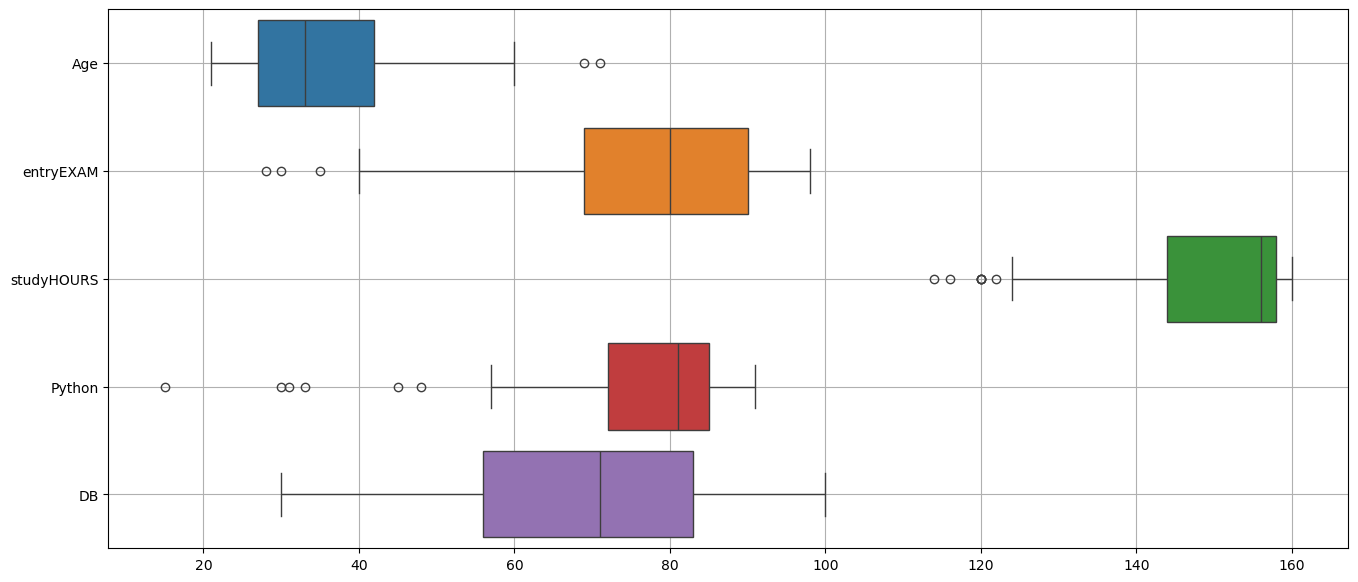

In [23]:
fig_large = plt.figure(figsize=(16, 7))
sns.boxplot(df, orient='h')
plt.grid(True)

---
#### **Q&A**
**Q:** Which values in studyHOURS, Python, or DB look unrealistic??

**A:** 

From both IQR method calculations and boxplot it's clear that the outliers are:
Study Hours Outliers are 120, 122, 116, 114, 120, 120, 120

Python Outliers are[33.0, 30.0, 31.0, 48.0, 45.0, 15.

Dhave no outliers
]

---

### 3.2 Handle outliers

In [24]:
df.shape

(77, 11)

In [25]:
# deleting outlier rows
df_new = df[(df['Age'] >= df_stats.loc['l_bound', 'Age']) & (df['Age'] <= df_stats.loc['u_bound','Age'])]
df_new = df_new[(df['entryEXAM'] >= df_stats.loc['l_bound', 'entryEXAM']) & (df['entryEXAM'] <= df_stats.loc['u_bound','entryEXAM'])]
df_new = df_new[(df['studyHOURS'] >= df_stats.loc['l_bound', 'studyHOURS']) & (df['studyHOURS'] <= df_stats.loc['u_bound','studyHOURS'])]
df_new = df_new[(df['Python'] >= df_stats.loc['l_bound', 'Python']) & (df['Python'] <= df_stats.loc['u_bound','Python'])]

C:\Users\Khalid\AppData\Local\Temp\ipykernel_27836\208640254.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_new = df_new[(df['entryEXAM'] >= df_stats.loc['l_bound', 'entryEXAM']) & (df['entryEXAM'] <= df_stats.loc['u_bound','entryEXAM'])]
C:\Users\Khalid\AppData\Local\Temp\ipykernel_27836\208640254.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_new = df_new[(df['studyHOURS'] >= df_stats.loc['l_bound', 'studyHOURS']) & (df['studyHOURS'] <= df_stats.loc['u_bound','studyHOURS'])]
C:\Users\Khalid\AppData\Local\Temp\ipykernel_27836\208640254.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_new = df_new[(df['Python'] >= df_stats.loc['l_bound', 'Python']) & (df['Python'] <= df_stats.loc['u_bound','Python'])]


In [26]:
df_new.index

Index([ 0,  1,  2,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42, 43, 44, 45, 46, 47, 50, 51, 52, 54, 56, 57, 58, 59, 60, 61, 62,
       63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75],
      dtype='int64')

In [27]:
df_new.shape

(67, 11)

In [28]:
df_new.reset_index(drop=True)

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,Male,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,High School,130,74.0,50
3,Hannah,Hansen,25,Female,Norway,BI Residence,66,High School,130,88.0,59
4,Ole,Johansen,27,Male,Norway,BI-Residence,90,Bachelors,156,80.0,91
...,...,...,...,...,...,...,...,...,...,...,...
62,Maximilan,Martini,50,Male,Italy,Private,74,Masters,140,63.0,60
63,Clara,Bernard,43,Female,France,Private,80,Bachelors,150,75.0,43
64,Julian,Nielsen,31,Male,Denmark,Sognsvann,90,Masters,158,84.0,83
65,Sophie,Brown,33,Female,Uk,Sognsvann,96,Masters,158,85.0,90


In [29]:
df_new.to_csv('cleaned_students.csv', index=False)

## Part 4 - Feature Engineering

### 4.1 Make average

In [30]:
df3 = pd.read_csv('cleaned_students.csv', index_col=False)
df3['prog_avg'] = (df3['Python'] + df3['DB'])/2
df3

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB,prog_avg
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55,57.0
1,Alex,Walekhwa,60,Male,Kenya,Private,79,Diploma,150,60.0,75,67.5
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,High School,130,74.0,50,62.0
3,Hannah,Hansen,25,Female,Norway,BI Residence,66,High School,130,88.0,59,73.5
4,Ole,Johansen,27,Male,Norway,BI-Residence,90,Bachelors,156,80.0,91,85.5
...,...,...,...,...,...,...,...,...,...,...,...,...
62,Maximilan,Martini,50,Male,Italy,Private,74,Masters,140,63.0,60,61.5
63,Clara,Bernard,43,Female,France,Private,80,Bachelors,150,75.0,43,59.0
64,Julian,Nielsen,31,Male,Denmark,Sognsvann,90,Masters,158,84.0,83,83.5
65,Sophie,Brown,33,Female,Uk,Sognsvann,96,Masters,158,85.0,90,87.5


### 4.2 Binary feature

In [31]:
df3['isAdult'] = (df3['Age'] >= 25).astype(int)
df3.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB,prog_avg,isAdult
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55,57.0,1
1,Alex,Walekhwa,60,Male,Kenya,Private,79,Diploma,150,60.0,75,67.5,1
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,High School,130,74.0,50,62.0,1
3,Hannah,Hansen,25,Female,Norway,BI Residence,66,High School,130,88.0,59,73.5,1
4,Ole,Johansen,27,Male,Norway,BI-Residence,90,Bachelors,156,80.0,91,85.5,1


In [32]:
df3['studyHOURS'].max()

160

### 4.3 Transform studyHOURS into categories

In [33]:
# bins are the ranges of each category
labels = ['Low', 'Medium', 'High']
df3['study_cat'] = pd.cut(df['studyHOURS'], bins=3, labels=labels, right=False)
df3.head(20)

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB,prog_avg,isAdult,study_cat
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55,57.0,1,High
1,Alex,Walekhwa,60,Male,Kenya,Private,79,Diploma,150,60.0,75,67.5,1,High
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,High School,130,74.0,50,62.0,1,Medium
3,Hannah,Hansen,25,Female,Norway,BI Residence,66,High School,130,88.0,59,73.5,1,Low
4,Ole,Johansen,27,Male,Norway,BI-Residence,90,Bachelors,156,80.0,91,85.5,1,Low
5,Lars,Olsen,29,Male,Norway,BIResidence,89,Bachelors,160,85.0,60,72.5,1,Medium
6,Bjørn,Larsen,31,Male,Norway,BI Residence,88,Bachelors,156,80.0,89,84.5,1,High
7,Sofie,Jensen,33,Female,Denmark,BI_Residence,85,Bachelors,160,83.0,90,86.5,1,High
8,Emma,de Vries,34,Female,Netherlands,BI Residence,65,Bachelors,156,79.0,58,68.5,1,High
9,Solveig,Eliassen,36,Female,Norway,Private,70,Diploma,156,80.0,55,67.5,1,High


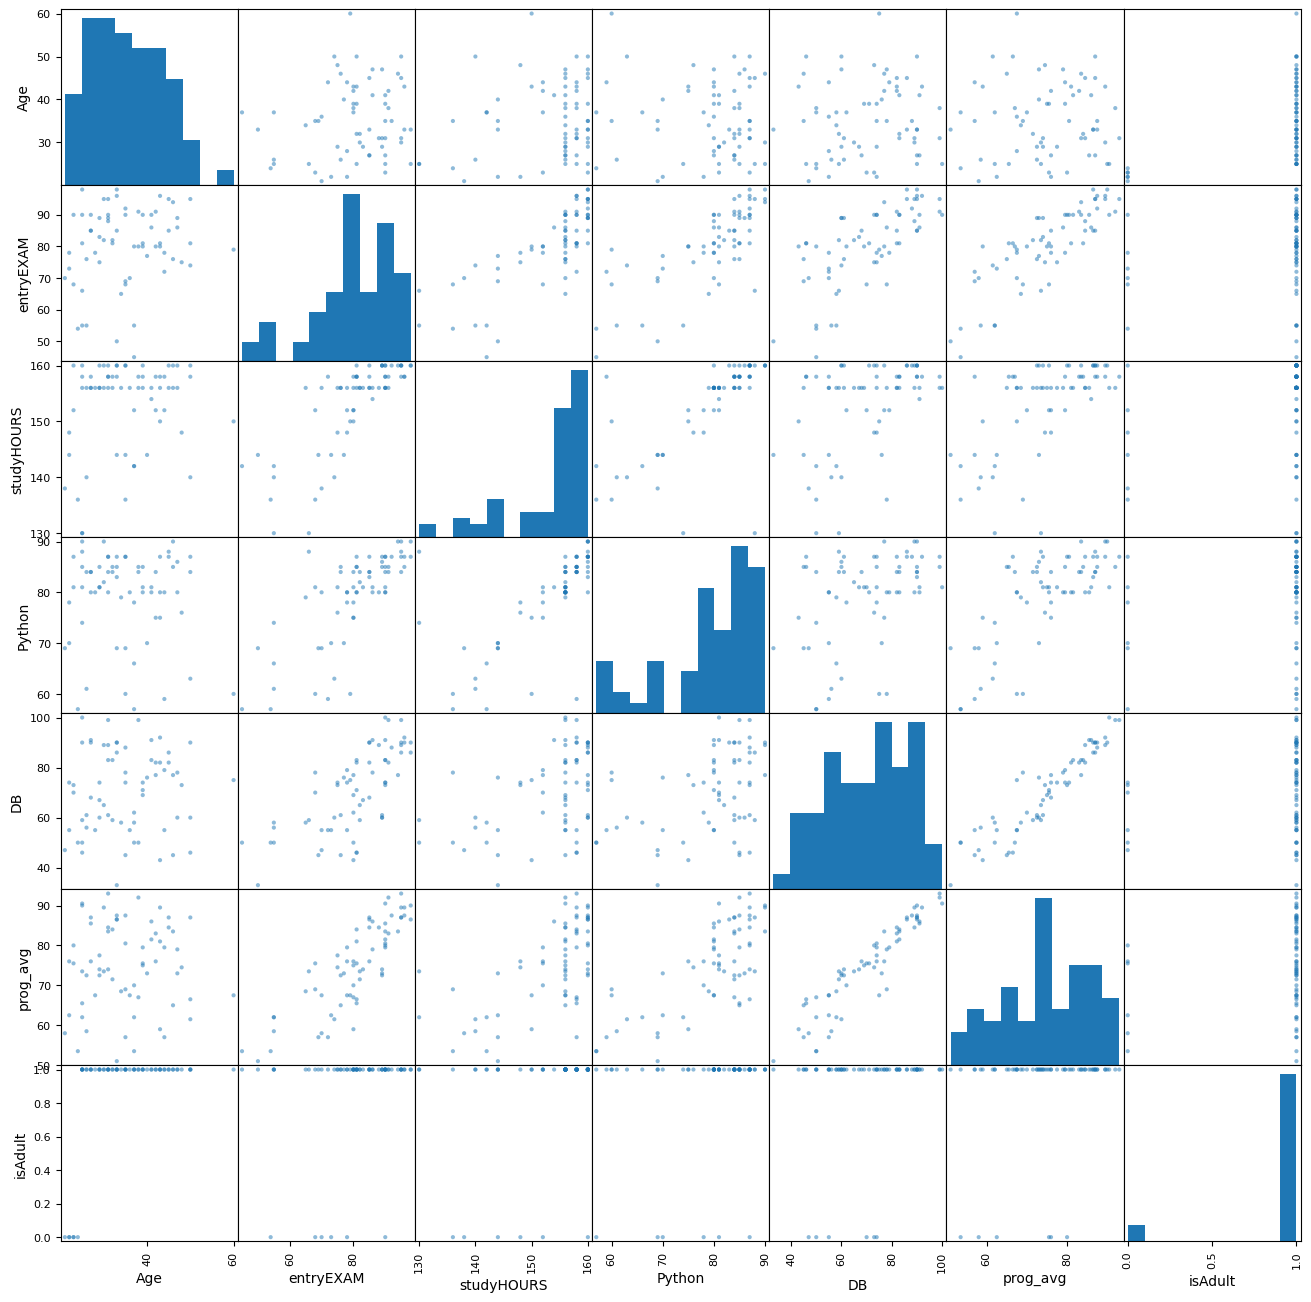

In [34]:
pd.plotting.scatter_matrix(df3, figsize=(16,16));
# plt.tight_layout();

---
#### Q&A:
**Q:** Which engineered feature do you think would add the most predictive power to the model?

**A:** Assuming that the programming average is the desired variable to be predicted. From the scatter matrix we can see that entryEXAM grade is the most correlated variable with the programming average grade (assuming they are not deterministically dependent with prog_average such as in the case of python and db grades)

---

## Part 5 - Feature Scaling

### 5.1 Detect Numeric Columns

In [36]:
df_num = df3.select_dtypes(include='number')
df_num

,Age,entryEXAM,studyHOURS,Python,DB,prog_avg,isAdult
0,44,72,158,59.0,55,57.0,1
1,60,79,150,60.0,75,67.5,1
2,25,55,130,74.0,50,62.0,1
3,25,66,130,88.0,59,73.5,1
4,27,90,156,80.0,91,85.5,1
...,...,...,...,...,...,...,...
62,50,74,140,63.0,60,61.5,1
63,43,80,150,75.0,43,59.0,1
64,31,90,158,84.0,83,83.5,1
65,33,96,158,85.0,90,87.5,1
